In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    ('JAVA_ERROR', 'error: unmappable character for encoding ASCII'),
    ('JAVA_ERROR','error: incompatible types'),
    ('JAVA_ERROR','error: cannot find symbol'),
    ('TASKS_ERROR','Invalid byte tag in constant pool'),
    ('GRADLE_ERROR', "A problem occurred evaluating root project"),
    ('NO_MEMORY_ERROR', 'Cannot allocate memory'),
    ('TASKS_ERROR', 'Could not determine which tasks to execute'),
    ('JAVA_ERROR','error: (.+)\n(.+)'),
    ('JAVA_ERROR','The import (.+) cannot be resolved'),
    ('DEPENDENCY_ERROR','(> Could not resolve|> Could not find) (.+)'),
    ('EXCEPTION_ERROR','Exception in thread (.+)'),
    ('GRADLE_ERROR','A problem occurred evaluating (.*)(\n)?(.*) (does not exist)?'),
    ('TASKS_ERROR','Execution failed for task (.*)'),
    ('NO_GRADLE_ERROR','gradlew: No such file or directory')
]
pa = ProjectAnalysis("SpringFramework",  "../spring-framework/step_1/%s", "report_step_1.csv")

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix
0,0,d303c8a,SUCCESS,44,Store PathPattern instead of String in attributes,{}
1,1,ab8310b,SUCCESS,45,Fix HeadersAdapters implementations,{}
2,2,fdaceeb,SUCCESS,44,Remove checks and updates to transfer-encoding,{}
3,3,2c5a1af,SUCCESS,44,Leverage Java reflection for Kotlin enums,{}
4,4,f885910,SUCCESS,44,Remove unused bom import too,{}


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           5772
commit       5772
build        5772
exec_time    5772
comment      5772
fix          5772
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           11610
commit       11610
build        11610
exec_time    11610
comment      11599
fix          11610
dtype: int64

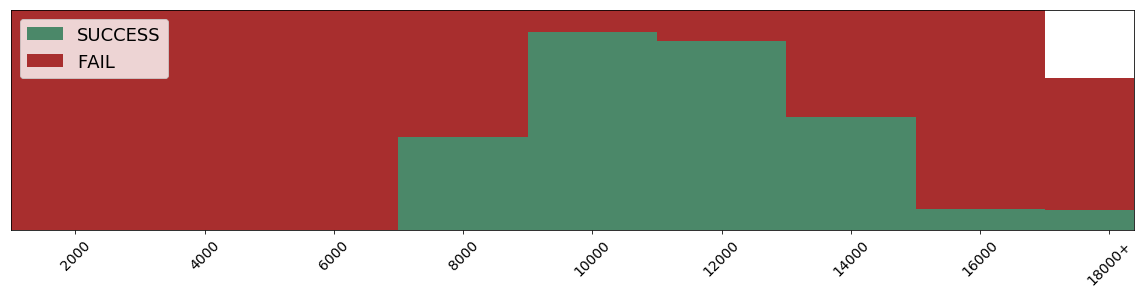

In [6]:
pa.plot_and_save_histogram(2000)

## We collect all the fails, separate them in groups and obtain the logs of each commit for failed builds

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df.groupby(['type']).agg({'count': 'sum'})

,count
type,
DEPENDENCY_ERROR,515
EXCEPTION_ERROR,565
GRADLE_ERROR,150
JAVA_ERROR,1623
NO_GRADLE_ERROR,5633
NO_MEMORY_ERROR,2369
TASKS_ERROR,754
UNKNOWN_ERROR,1


In [10]:
df.groupby(['key','type','message']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)

,,,count
key,type,message,
ccdb01712ea99a72ad11e3dc5e165303,NO_GRADLE_ERROR,gradlew: No such file or directory,5633
235a844d63971a9fbf3bf17fd4c18fe2,NO_MEMORY_ERROR,Cannot allocate memory,2369
96a7289b304c2f9f0fe696b0c9e3ce52,EXCEPTION_ERROR,"Exception in thread ""DisconnectableInputStream source reader"" org.gradle.api.UncheckedIOException: java.io.IOException: Bad file descriptor",524
0b3e868b173ef8c4425a4c4bfe798457,TASKS_ERROR,Invalid byte tag in constant pool,470
5b15d268dc71a83ef2deca0f11844141,DEPENDENCY_ERROR,"> Could not find group:com.itextpdf, module:itextpdf, version:4.2.2.",460
544ccf6f925572feae9fa33bde8ce412,JAVA_ERROR,The import java.util.Arrays cannot be resolved,398
fa412f159617fae287c1468a983063ad,JAVA_ERROR,error: warnings found and -Werror specified 1 error,328
6742305c4ac74d1bd97839f73f2b73b0,TASKS_ERROR,Could not determine which tasks to execute,206
282fa9cf2bd5e6543a47b03c7d6b6afd,GRADLE_ERROR,A problem occurred evaluating root project,150


In [11]:
pa.view_log_by_hash(errors,'282fa9cf2bd5e6543a47b03c7d6b6afd', 0)

":buildSrc:compileJava UP-TO-DATE\n:buildSrc:compileGroovy\n:buildSrc:processResources\n:buildSrc:classes\n:buildSrc:jar\n:buildSrc:assemble\n:buildSrc:compileTestJava UP-TO-DATE\n:buildSrc:compileTestGroovy UP-TO-DATE\n:buildSrc:processTestResources UP-TO-DATE\n:buildSrc:testClasses UP-TO-DATE\n:buildSrc:test UP-TO-DATE\n:buildSrc:check UP-TO-DATE\n:buildSrc:build\n\nFAILURE: Build failed with an exception.\n\n* Where:\nBuild file '/home/ubuntu/bugs/spring-framework/build.gradle' line: 125\n\n* What went wrong:\nA problem occurred evaluating root project 'spring'.\n> Basedir /home/ubuntu/bugs/spring-framework/spring-instrument-tomcat does not exist\n\n* Try:\nRun with --stacktrace option to get the stack trace. Run with --info or --debug option to get more log output.\n\nBUILD FAILED\n\nTotal time: 11.63 secs\n"